# Personal Information
Name: **Thomas Erhard**

StudentID: **15081931**

Email: [**thomas.erhard@student.uva.nl**](thomas.erhard@student.uva.nl)

Submitted on: **22.03.2024**

GitHub Link: [**DeepRM**](https://github.com/Jinobey/DeepRM_2)

# Data Context

The dataset used for this thesis project is created by DeepRM_2 using *create_jobs.py* and thus synthetic. This presents a significant benefit, as it allows for adjustments and experiments with various settings and parameters, enabling the creation of a big volume of data for training our reinforcement learning (RL) agent. Given that Deep Reinforcement Learning (DRL) models typically require extensive data to devise an effective strategy, this feature of our dataset is particularly advantageous. While the used dataset adopts a simplified approach to encapsulate the aspects of multi-resource scheduling, it remains a complex scenario, enabling us to examine the efficacy of RL techniques in the field.

Bearing this in mind, it is anticipated that the current dataset may undergo changes in the future, which means that the exploratory data analysis (EDA) could yield different insights. Despite this, the present EDA provides a valuable initial understanding of the data's context.

# Data Description

**Present here the results of your exploratory data analysis. Note that there is no need to have a "story line" - it is more important that you show your understanding of the data and the methods that you will be using in your experiments (i.e. your methodology).**

**As an example, you could show data, label, or group balances, skewness, and basic characterizations of the data. Information about data frequency and distributions as well as results from reduction mechanisms such as PCA could be useful. Furthermore, indicate outliers and how/why you are taking them out of your samples, if you do so.**

**The idea is, that you conduct this analysis to a) understand the data better but b) also to verify the shapes of the distributions and whether they meet the assumptions of the methods that you will attempt to use. Finally, make good use of images, diagrams, and tables to showcase what information you have extracted from your data.**

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [2]:
# Load data
df_jobs = pd.read_csv("../data/jobs.csv")
df_jobs

,Job Length,Job Resource 1,Job Resource 2
0,16,1.0,10.0
1,2,2.0,9.0
2,3,6.0,2.0
3,3,1.0,9.0
4,21,10.0,1.0
...,...,...,...
99995,3,1.0,5.0
99996,1,2.0,7.0
99997,17,1.0,7.0
99998,3,2.0,7.0


For the purpose of this EDA, 100000 jobs have been created. A job consist of the *job duration*, which is represented by $T_j$ and is normally in the range between 1 and 18. For jobs that take more time, these are classified as anomalous jobs. As we have to control to create anomalous jobs, we fixed them to a maximum duration of 29t:

\begin{equation}
    T_{j_{Normal}} = \{T \in \mathbb{N} \space | \space 1 \leq T \leq 18 \}
\end{equation}

\begin{equation}
    T_{j_{Anomalous}} = \{T \in \mathbb{N} \space | \space 19 \leq T \leq 29 \}
\end{equation}

Furthermore, each job consist of a *resource profile* $r_j$, that is known upon job arrival, and which consist of *d* resource types (such as CPU, mermory, I/O etc.) We fixed the amount of resource types to two and operated under the assumption of no preemption and a static allocation profile. This means that $r_j$ must be consistently allocated from the start of execution until the job is complete, mirroring the approach used in DeepRM. The job resource profile is represented as an vector:

\begin{equation}
    \vec{r}_j = \left( [r1_{j_1}, r2_{j_1}], [r1_{j_2}, r2_{j_2}], \ldots, [r1_{j_n}, r2_{j_n}] \right)
\end{equation}

Here after, we define what consists of a normal and what consist of an anomalous resource requirement:

\begin{equation}
    r_{j_{Normal}} = \{r \in \mathbb{N} \space | \space 1 \leq r \leq 10 \}
\end{equation}

\begin{equation}
    r_{j_{Anomalous}} = \{r \in \mathbb{N} \space | \space 11 \leq r \leq 15 \}
\end{equation}

### Analysis 1: 
Here, we explore the distribution of the job durations.

In [8]:
df_jobs.describe()

,Job Length,Job Resource 1,Job Resource 2
count,100000.000000,100000.00000,100000.000000
mean,6.353160,4.63035,4.618060
std,6.997743,3.45116,3.450078
min,1.000000,1.00000,1.000000
25%,2.000000,2.00000,1.000000
50%,3.000000,5.00000,2.000000
75%,13.000000,8.00000,8.000000
max,28.000000,14.00000,14.000000


#### Job Duration

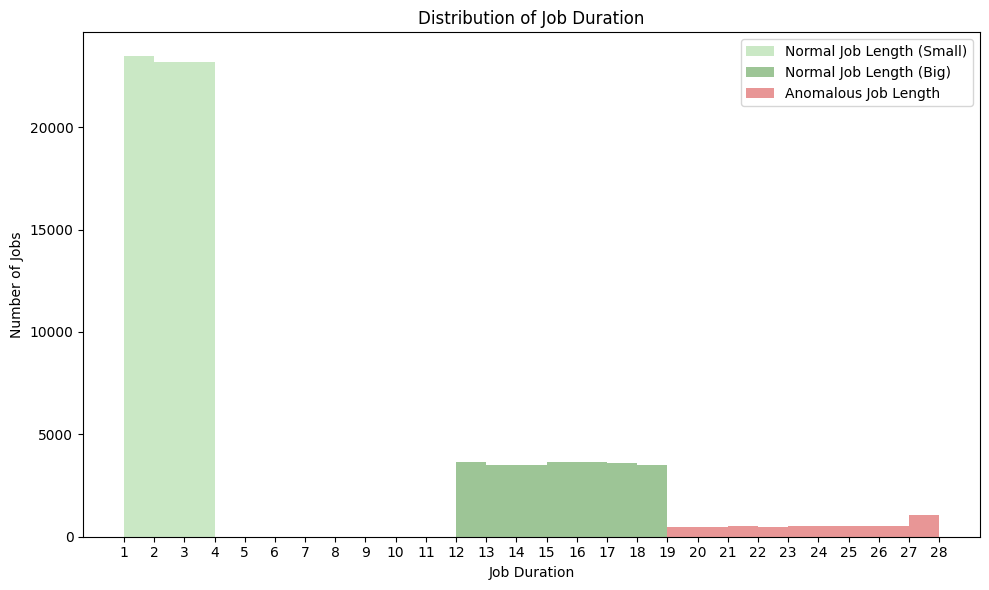

In [3]:
# Splitting the jobs into two categories based on length
jobs_small = df_jobs[df_jobs['Job Length'] <= 3.6 ]['Job Length']
jobs_big = df_jobs[(df_jobs['Job Length'] >= 12) & (df_jobs['Job Length'] <= 18)]['Job Length']
jobs_anomalous = df_jobs[df_jobs['Job Length'] > 18]['Job Length']

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Plotting histograms for each category of job lengths
plt.hist(jobs_small, bins=range(1, df_jobs['Job Length'].max() + 1), alpha=0.5, label='Normal Job Length (Small)', color="#96D38C")
plt.hist(jobs_big, bins=range(1, df_jobs['Job Length'].max() + 1), alpha=0.5, label='Normal Job Length (Big)', color="#3C8D2F")
plt.hist(jobs_anomalous, bins=range(1, df_jobs['Job Length'].max() + 1), alpha=0.5, label='Anomalous Job Length', color="#D32F2F")

# Customization
plt.title('Distribution of Job Duration')
plt.xlabel('Job Duration')
plt.ylabel('Number of Jobs')
plt.xticks(range(1, df_jobs['Job Length'].max() + 1))  # Adjust x-axis ticks for clarity
plt.legend()  # Add a legend to distinguish between categories

# Show plot
plt.tight_layout()  # Adjust layout to make room for the plot elements
plt.show()

In [4]:
# Unqiue job lengths
np.unique(df_jobs['Job Length'])

array([ 1,  2,  3, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 28])

In [5]:
# Total number of jobs
total_jobs = len(df_jobs)

# Normal and Anomalous Jobs
normal_jobs = df_jobs[df_jobs['Job Length'] <= 18]
anomalous_jobs = df_jobs[df_jobs['Job Length'] > 18]

# Small and Big Jobs (within normal jobs)
small_jobs = df_jobs[df_jobs['Job Length'] <= 3.6]
big_jobs = df_jobs[(df_jobs['Job Length'] > 3.6) & (df_jobs['Job Length'] <= 18)]

# Calculate counts
count_normal = len(normal_jobs)
count_anomalous = len(anomalous_jobs)
count_small = len(small_jobs)
count_big = len(big_jobs)

# Calculate proportions
prop_normal = count_normal / total_jobs
prop_anomalous = count_anomalous / total_jobs
prop_small = count_small / total_jobs
prop_big = count_big / total_jobs

# Print results
print(f"Total Jobs: {total_jobs}")
print(f"Normal Jobs: {count_normal} ({prop_normal:.2%})")
print(f"Anomalous Jobs: {count_anomalous} ({prop_anomalous:.2%})")
print(f"Small Jobs: {count_small} ({prop_small:.2%})")
print(f"Big Jobs: {count_big} ({prop_big:.2%})")

Total Jobs: 100000
Normal Jobs: 94895 (94.89%)
Anomalous Jobs: 5105 (5.10%)
Small Jobs: 69841 (69.84%)
Big Jobs: 25054 (25.05%)


We can observe, that the job lengths are in two categorised into two categories, normal and anomalous jobs. Anomalous jobs have a lengths of 18 or higher, while jobs with a length equal or less than 18 are considered normal. It can be observed, that the distribution of normal jobs is quite interesting, with again two categories, small and big jobs. Small jobs are defined as $[1, J_L /5] = [1, 18 /5] = [1, 3.6]$ and big jobs are defined as $[J_L * 2/3, J_L] = [18 * 2/3, 18] = [12, 18]$,

where $J_L$ = Job Length.

There are no jobs



#### Job Resources

In [35]:
# Unqiue job resources
np.unique(df_jobs['Job Resource 1']) #same for resource 2

array([ 1.,  2.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.])

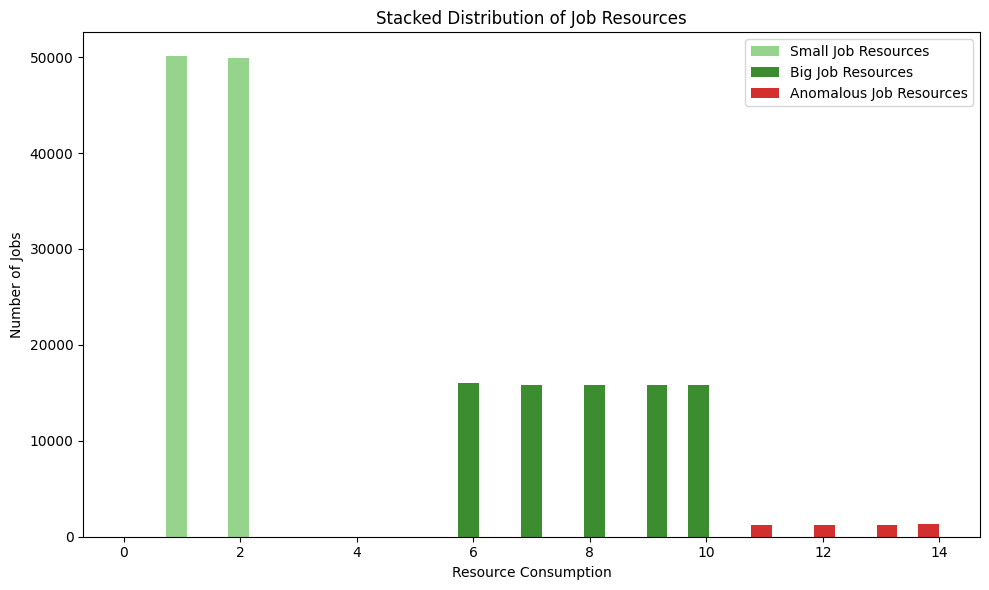

In [16]:
# Categorize 'Job Resource 1'
jobs_small_res1 = df_jobs[df_jobs['Job Resource 1'] <= 2]['Job Resource 1']
jobs_big_res1 = df_jobs[(df_jobs['Job Resource 1'] > 5) & (df_jobs['Job Resource 1'] <= 10)]['Job Resource 1']
jobs_anomalous_res1 = df_jobs[df_jobs['Job Resource 1'] > 10]['Job Resource 1']

# Categorize 'Job Resource 2'
jobs_small_res2 = df_jobs[df_jobs['Job Resource 2'] <= 2]['Job Resource 2']
jobs_big_res2 = df_jobs[(df_jobs['Job Resource 2'] > 5) & (df_jobs['Job Resource 2'] <= 10)]['Job Resource 2']
jobs_anomalous_res2 = df_jobs[df_jobs['Job Resource 2'] > 10]['Job Resource 2']

# Combine categories from both resources for stacking
jobs_small_combined = np.hstack((jobs_small_res1, jobs_small_res2))
jobs_big_combined = np.hstack((jobs_big_res1, jobs_big_res2))
jobs_anomalous_combined = np.hstack((jobs_anomalous_res1, jobs_anomalous_res2))

# Determine the range for bins
max_resource_value = max(jobs_small_combined.max(), jobs_big_combined.max(), jobs_anomalous_combined.max())
bins_range = np.linspace(0, max_resource_value, 40)  # Adjust the number of bins as necessary

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Stacking histograms for each category
plt.hist([jobs_small_combined, jobs_big_combined, jobs_anomalous_combined], bins=bins_range, stacked=True, label=['Small Job Resources', 'Big Job Resources', 'Anomalous Job Resources'], color=["#96D38C", "#3C8D2F", "#D32F2F"])

# Customization
plt.title('Stacked Distribution of Job Resources')
plt.xlabel('Resource Consumption')
plt.ylabel('Number of Jobs')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

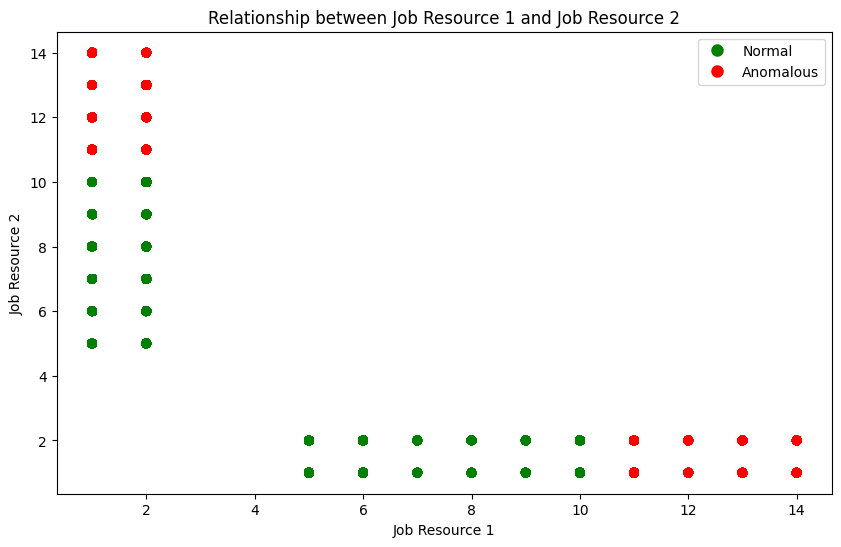

In [28]:
from matplotlib.lines import Line2D

# Assuming your DataFrame is df_jobs

# Define conditions for each category
conditions = [
    # Normal: Either Resource 1 is big and Resource 2 is small, or Resource 2 is big and Resource 1 is small
    (((df_jobs['Job Resource 1'] >= 5) & (df_jobs['Job Resource 1'] <= 10) & (df_jobs['Job Resource 2'] >= 1) & (df_jobs['Job Resource 2'] <= 2)) |
     ((df_jobs['Job Resource 2'] >= 5) & (df_jobs['Job Resource 2'] <= 10) & (df_jobs['Job Resource 1'] >= 1) & (df_jobs['Job Resource 1'] <= 2))),
    # Anomalous: Resource 1 or Resource 2 is anomalously high
    ((df_jobs['Job Resource 1'] >= 11) & (df_jobs['Job Resource 1'] <= 15)) | 
    ((df_jobs['Job Resource 2'] >= 11) & (df_jobs['Job Resource 2'] <= 15))
]

choices = ['Normal', 'Anomalous']
df_jobs['Category'] = np.select(conditions, choices)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

colors = {'Normal': 'green', 'Anomalous': 'red'}

ax.scatter(df_jobs['Job Resource 1'], df_jobs['Job Resource 2'], c=df_jobs['Category'].map(colors), alpha=0.5)
ax.set_xlabel('Job Resource 1')
ax.set_ylabel('Job Resource 2')
ax.set_title('Relationship between Job Resource 1 and Job Resource 2')

# Creating a custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Normal', markerfacecolor='green', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Anomalous', markerfacecolor='red', markersize=10)
]
ax.legend(handles=legend_elements)

plt.show()

In [30]:
small_jobs = df_jobs[((df_jobs['Job Resource 1'] >= 1) & (df_jobs['Job Resource 1'] <= 2)) | ((df_jobs['Job Resource 2'] >= 1) & (df_jobs['Job Resource 2'] <= 2))]
big_jobs = df_jobs[((df_jobs['Job Resource 1'] >= 5) & (df_jobs['Job Resource 1'] <= 10)) | ((df_jobs['Job Resource 2'] >= 5) & (df_jobs['Job Resource 2'] <= 10))]
anomalous_jobs = df_jobs[((df_jobs['Job Resource 1'] >= 11) & (df_jobs['Job Resource 1'] <= 15)) | ((df_jobs['Job Resource 2'] >= 11) & (df_jobs['Job Resource 2'] <= 15))]

# Calculate counts
count_small = len(small_jobs)
count_big = len(big_jobs)
count_anomalous = len(anomalous_jobs)
total_jobs = count_small + count_big + count_anomalous  # Recalculated to exclude any jobs not fitting the defined categories

# Calculate proportions
prop_small = count_small / total_jobs
prop_big = count_big / total_jobs
prop_anomalous = count_anomalous / total_jobs

# Print results
print(f"Total Job Resources Categorized: {total_jobs}")
print(f"Small Job Resources: {count_small} ({prop_small:.2%})")
print(f"Big Job Resources: {count_big} ({prop_big:.2%})")
print(f"Anomalous Job Resources: {count_anomalous} ({prop_anomalous:.2%})")

Total Job Resources Categorized: 200000
Small Job Resources: 100000 (50.00%)
Big Job Resources: 94978 (47.49%)
Anomalous Job Resources: 5022 (2.51%)


### Analysis 2: 

In [4]:
# ...

### Analysis n:

In [5]:
# ...